# Final Project 2023
Machine Learning for Biomedical Data Science

Team Xtreme Gradient Dissenters

Members: Audrey Lee, Christian Porras, Joy Jiang

April 24, 2023

In [ ]:
!git clone https://github.com/chrisporras/xgdiss.git

Cloning into 'xgdiss'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 3.59 KiB | 1.79 MiB/s, done.


In [ ]:
# install Kaggle public api
! pip install -q kaggle
# Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle
! cp ./xgdiss/kaggle.json ~/.kaggle/
# Make directory named kaggle and copy kaggle.json file there.
!chmod 600 ~/.kaggle/kaggle.json
#Change the permissions of the file.
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           4951        191  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00            917         28  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           1161         32  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
!kaggle datasets download -d arianghasemi/mayo-clinic-resized-5gb

 99% 842M/849M [00:06<00:00, 143MB/s]
100% 849M/849M [00:06<00:00, 133MB/s]


In [ ]:
!unzip mayo-clinic-resized-5gb.zip

Archive:  mayo-clinic-resized-5gb.zip
  inflating: data/train.csv          
  inflating: data/train_imgs/006388_0  
  inflating: data/train_imgs/008e5c_0  
  inflating: data/train_imgs/00c058_0  
  inflating: data/train_imgs/01adc5_0  
  inflating: data/train_imgs/026c97_0  
  inflating: data/train_imgs/028989_0  
  inflating: data/train_imgs/029c68_0  
  inflating: data/train_imgs/032f10_0  
  inflating: data/train_imgs/0372b0_0  
  inflating: data/train_imgs/037300_0  
  inflating: data/train_imgs/03d1ec_0  
  inflating: data/train_imgs/03e6b7_0  
  inflating: data/train_imgs/0415c3_0  
  inflating: data/train_imgs/04439c_0  
  inflating: data/train_imgs/045eb0_0  
  inflating: data/train_imgs/0468a8_0  
  inflating: data/train_imgs/0468a8_1  
  inflating: data/train_imgs/049194_0  
  inflating: data/train_imgs/049194_1  
  inflating: data/train_imgs/04f7a4_0  
  inflating: data/train_imgs/055f6a_0  
  inflating: data/train_imgs/05a1ec_0  
  inflating: data/train_imgs/062387_0  
  in

In [ ]:
train_df = pd.read_csv('./data/train.csv')
train_df

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE
750,fe9bec_0,4,fe9bec,0,LAA
751,ff14e0_0,6,ff14e0,0,CE
752,ffec5c_0,7,ffec5c,0,LAA


In [ ]:
train_df["file_path"] = train_df["image_id"].apply(lambda x: "./data/train_imgs/" + x)
train_df

,image_id,center_id,patient_id,image_num,label,file_path
0,006388_0,11,006388,0,CE,./data/train_imgs/006388_0
1,008e5c_0,11,008e5c,0,CE,./data/train_imgs/008e5c_0
2,00c058_0,11,00c058,0,LAA,./data/train_imgs/00c058_0
3,01adc5_0,11,01adc5,0,LAA,./data/train_imgs/01adc5_0
4,026c97_0,4,026c97,0,CE,./data/train_imgs/026c97_0
...,...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE,./data/train_imgs/fe9645_0
750,fe9bec_0,4,fe9bec,0,LAA,./data/train_imgs/fe9bec_0
751,ff14e0_0,6,ff14e0,0,CE,./data/train_imgs/ff14e0_0
752,ffec5c_0,7,ffec5c,0,LAA,./data/train_imgs/ffec5c_0


In [ ]:
%%time
x_train = []
for path in tqdm(train_df["file_path"]):
    with open(path,"rb") as f:
        img = pickle.load(f)
    x_train.append(img)

100%|██████████| 754/754 [00:06<00:00, 116.49it/s]

CPU times: user 298 ms, sys: 3.26 s, total: 3.56 s
Wall time: 6.48 s


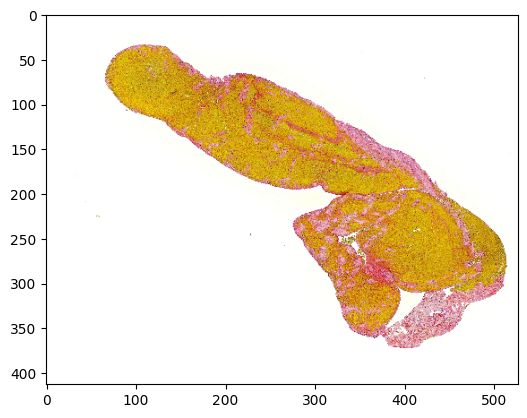

In [ ]:
plt.imshow(x_train[4])

In [ ]:
import torch

In [ ]:
class CustomImageDataset(torch.utils.data.Dataset):
    """Make a custom dataset for the pathology patches"""  
    def __init__(self, image_dir, df, transform=None, testset=False):
        # Create one iterable that can be __getitemed__
        self.image_dir = image_dir
        self.df = df
        self.transform = transform # added transform
        self.testset = testset # indicates if dataset is the test set

    def __len__(self): # Denotes the total number of samples
        # return self.df.shape[0] # orig
        return len(self.df) # try this

    # def normalize(self, image):
      # return image

    def __getitem__(self, index): # Generates one sample of data
        
        # added this
        if torch.is_tensor(index):
          index = index.tolist()

        # Goes to image_tensor below
        image_path = os.path.join(self.image_dir, self.df.iloc[index]['img_id'])
        image_og = imread(image_path, as_gray=True) # read in png or jpg

        # Apply image-level conversion and/or normalization for preprocessing
        image = self.normalize(image_og)

        # Convert to 3D tensor
        t = ToTensor3D()
        image = t(image)

        if self.transform:
          image = self.transform(image)

        # Since the test set has no label_num, we get the image id
        if not(self.testset):
          label = torch.tensor(self.df.iloc[index]['label'],dtype=torch.long)
        else:
          label = self.df.iloc[index]['id']
        
        return image, label

We use group stratified k fold splitting to create 64%-16%-20% training-validation-testing splits to ensure relatively equal class distribution while safeguarding against data leakage.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold

gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(train_df['image_id'], train_df['label'], groups=train_df['patient_id'])

for fold,(trainval_idx, test_idx) in enumerate(splitter):
  trainval = train_df.loc[trainval_idx]
  test = train_df.loc[test_idx]
  train_label_count = trainval['label'].value_counts()
  testval_label_count = test['label'].value_counts()
  break

In [ ]:
trainval = trainval.reset_index()
test = test.reset_index
test.to_csv('test.csv')

AttributeError: ignored

In [ ]:
gskf = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 42)
splitter = gskf.split(trainval['image_id'], trainval['label'], groups=trainval['patient_id'])
for fold,(train_idx, val_idx) in enumerate(splitter):
  train = trainval.loc[train_idx]
  val = trainval.loc[val_idx]
  train_label_count = train['label'].value_counts()
  val_label_count = val['label'].value_counts()
  break

train = train.reset_index()
val = val.reset_index

print(train)
print(val)

train.to_csv('train.csv')
val.to_csv('val.csv')

     level_0  index  image_id  center_id patient_id  image_num label  \
0          1      1  008e5c_0         11     008e5c          0    CE   
1          2      2  00c058_0         11     00c058          0   LAA   
2          4      5  028989_0          5     028989          0   LAA   
3          5      6  029c68_0          5     029c68          0    CE   
4          6      7  032f10_0          7     032f10          0    CE   
..       ...    ...       ...        ...        ...        ...   ...   
494      607    747  fdf998_1          4     fdf998          1    CE   
495      608    748  fe0cca_0          1     fe0cca          0    CE   
496      610    751  ff14e0_0          6     ff14e0          0    CE   
497      611    752  ffec5c_0          7     ffec5c          0   LAA   
498      612    753  ffec5c_1          7     ffec5c          1   LAA   

                      file_path  
0    ./data/train_imgs/008e5c_0  
1    ./data/train_imgs/00c058_0  
2    ./data/train_imgs/028989_0  